In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Вариативность среднего значения выборки

> Часть курса <a href="https://docs.microsoft.com/ru-ru/learn/modules/compare-two-samples-by-bootstrapping/">«Основы обработки и анализа данных»</a> от Microsoft с переработанными примерами под библиотеку `pandas`.

Согласно теореме о центральном пределе, распределение вероятности среднего значения большой случайной выборки является примерно нормальным. Центр колоколообразной кривой приходится на среднее значение генеральной совокупности. Некоторые из средних значений выборки выше, а некоторые ниже, однако отклонения от среднего значения генеральной совокупности расположены приблизительно симметрично на каждой стороне, что наблюдается постоянно. Формально теория вероятностей показывает, что среднее значение выборки является несмещенной оценкой среднего значения генеральной совокупности.

В нашем моделировании мы также заметили, что средние значения более крупных выборок, как правило, более тесно сгруппированы вокруг среднего значения генеральной совокупности, чем средние значения небольших выборок. В этом разделе мы количественно определим вариативность среднего значения выборки и определим зависимость вариативности от размера выборки.

Начнем с таблицы задержек авиарейсов. Средняя задержка составляет примерно 16,7 минут, а распределение задержек смещено вправо.

In [2]:
united = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/inferentialthinking/master/data/united_summer2015.csv')

In [3]:
delay = united['Delay']

In [4]:
pop_mean = np.mean(delay)
pop_mean

16.658155515370705

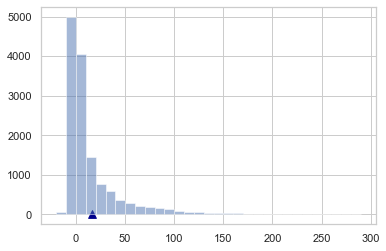

In [11]:
united['Delay'].hist(bins=np.arange(-20, 300, 10), alpha=.5)
plt.scatter(pop_mean, -0.0008, marker='^', color='darkblue', s=60);

Теперь давайте рассмотрим случайные выборки и посмотрим на распределение вероятности среднего значения выборки. Как обычно, мы воспользуемся моделированием, чтобы получить эмпирическое приближение к этому распространению.

Для этого мы определим функцию `simulate_sample_mean`, поскольку в дальнейшем мы будем менять размер выборки. Аргументы — это имя таблицы, метка столбца, содержащего переменную, размер выборки и количество моделирований.

In [22]:
def simulate_sample_mean(table, label, sample_size, repetitions):

    """Empirical distribution of random sample means"""

    means = np.zeros(repetitions)

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample[label])
        means[i] = new_sample_mean

    sample_means = pd.DataFrame(means, columns=['Sample Means'])

    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20, alpha=.5)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size:", sample_size)
    print("Population mean:", np.mean(table[label]))
    print("Average of sample means:", np.mean(means))
    print("Population SD:", np.std(table[label]))
    print("SD of sample means:", np.std(means))

Мы моделируем среднее значение случайной выборки из 100 задержек, затем из 400 задержек и, наконец, из 625 задержек. Мы выполним 10 000 повторений каждого из этих процессов. Для простоты сравнения строки `xlim` и `ylim` обеспечивают согласованность осей на всех графиках. Можно просто игнорировать эти две строки кода в каждой ячейке.

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.699919000000005
Population SD: 39.48019985160957
SD of sample means: 3.92847891981604


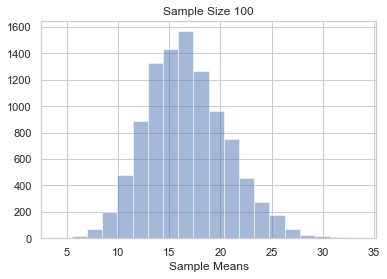

In [24]:
simulate_sample_mean(united, 'Delay', 100, 10000)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.68494425
Population SD: 39.48019985160957
SD of sample means: 1.9441739428397184


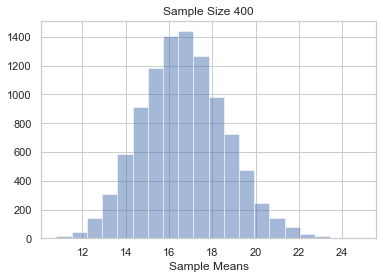

In [26]:
simulate_sample_mean(united, 'Delay', 400, 10000)

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.663518879999998
Population SD: 39.48019985160957
SD of sample means: 1.5457079293823737


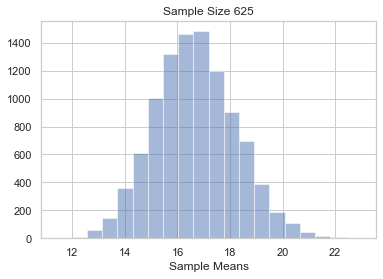

In [27]:
simulate_sample_mean(united, 'Delay', 625, 10000)

Вы можете наблюдать теорему о центральном пределе в действии — гистограммы средних значений выборки являются примерно нормальными, несмотря на то, что гистограмма самих задержек далека от нормальной.

Кроме того, можно увидеть, что центр каждой из трех гистограмм средних значений выборки находится очень близко к среднему значению генеральной совокупности. В каждом случае "среднее средних значений выборки" очень близко к 16,66 минутам, среднему значению генеральной совокупности. Оба значения предоставлены в примечании над каждой гистограммой. Как и ожидалось, среднее значение выборки является несмещенной оценкой среднего значения генеральной совокупности.

## СО всех средних значений выборки
Кроме того, можно увидеть, что по мере увеличения размера выборки гистограммы становятся более узкими и, следовательно, более высокими. Мы видели это раньше, однако теперь нас интересует мера распределения.

СО генеральной совокупности всех задержек составляет около 40 минут.

In [29]:
pop_sd = np.std(united['Delay'])
pop_sd

39.48019985160957

Обратите внимание на СО на гистограммах среднего значения выборки выше. Во всех трех случаях СО генеральной совокупности задержек составляет порядка 40 минут, поскольку все выборки взяты из одной и той же генеральной совокупности.

Теперь взгляните на СО средних значений всех 10 000 выборок, когда размер выборки составляет 100. Это СО составляет примерно одну десятую от СО генеральной совокупности. Если размер выборки составляет 400, то СО всех средних значений выборки составляет порядка одной двадцатой СО генеральной совокупности. Если размер выборки составляет 625, то СО средних значений выборки составляет порядка одной двадцать пятой СО генеральной совокупности.

Похоже, необходимо сравнить СО эмпирического распределения средних значений выборки с количеством "СО генеральной совокупности, разделенным на квадратный корень размера выборки".

Числовые значения будут следующими. Для каждого размера выборки в первом столбце были выбраны 10 000 случайных выборок этого размера, а также вычислено 10 000 средних значений выборки. Второй столбец содержит СО этих 10 000 средних значений выборки. Третий столбец содержит результат вычисления "СО генеральной совокупности, разделенного на квадратный корень размера выборки".

Выполнение этой ячейки займет некоторое время, поскольку это достаточно большое моделирование. Но вскоре вы увидите, что результат стоит ожидания.

In [52]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = np.zeros(len(sample_sizes))

for m, n in enumerate(sample_sizes):
    means = np.zeros(repetitions)
    for i in np.arange(repetitions):
        means[i] = np.mean(delay.sample(n))
    sd_means[m] = np.std(means)

sd_comparison = pd.DataFrame(zip(sample_sizes,
                                 sd_means,
                                 pop_sd / np.sqrt(sample_sizes)),
                                 columns=['Sample Size n',
                                          'SD of 10,000 Sample Means',
                                          'pop_sd/sqrt(n)'])

sd_comparison

,Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
0,25,7.978498,7.896040
1,50,5.585559,5.583343
2,75,4.556943,4.558781
3,100,3.964589,3.948020
4,125,3.529616,3.531216
5,150,3.240238,3.223545
6,175,2.912352,2.984423
7,200,2.781642,2.791672
8,225,2.630197,2.632013
9,250,2.498611,2.496947


Значения во втором и третьем столбцах очень близки. Если построить график по каждому из этих столбцов с размером выборки на горизонтальной оси, эти два графика, по сути, будут неразличимы.

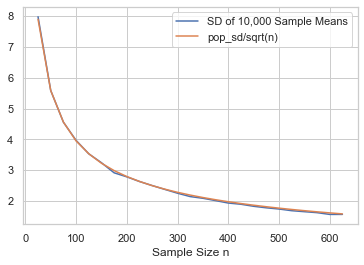

In [54]:
sd_comparison.plot('Sample Size n');

На самом деле имеется две кривых. Но они настолько близки друг к другу, что выглядят так, будто имеется только одна кривая.

Мы видим экземпляр общего результата. Помните, что приведенный выше график основан на 10 000 репликаций для каждого размера выборки. Однако существует более 10 000 выборок каждого размера. Распределение вероятности среднего значения выборки основано на средних значениях всех возможных выборок фиксированного размера.

Фиксирование размера выборки. Если выборки осуществляются случайным образом с заменой из генеральной совокупности, то

$$SD_{N} = \frac{SD}{\sqrt{n}}$$

Это стандартное отклонение средних значений всех возможных выборок, которые могут быть выбраны. Оно приблизительно измеряет то, насколько далеко средние значения выборки находятся от среднего значения генеральной совокупности.

## Теорема о центральном пределе для среднего значения выборки
Если выполнить крупную случайную выборку с заменой из генеральной совокупности, то, независимо от распределения генеральной совокупности, распределение вероятности среднего значения выборки будет примерно нормальным, с центром в среднем значении генеральной совокупности и с СО, равным СО генеральной совокупности, поделенным на квадратный корень размера выборки.

## Точность среднего значения выборки
СО всех возможных средних значений выборки измеряет то, насколько вариативным может быть среднее значение выборки. Таким образом, оно принимается как мера точности среднего значения выборки в качестве приблизительной оценки среднего значения генеральной совокупности. Чем меньше СО, тем точнее приблизительная оценка.

Из формулы видно, что:
- Размер генеральной совокупности не влияет на точность среднего значения выборки. Размер генеральной совокупности не используется в формуле.

- СО генеральной совокупности является постоянным; оно одинаково для каждой выборки, взятой из генеральной совокупности.

Размер выборки может быть различным. Поскольку размер выборки указывается в знаменателе, вариативность среднего значения _уменьшается_ по мере увеличения размера выборки, поэтому точность увеличивается.

## Закон квадратного корня

Из таблицы сравнения СО видно, что СО средних значений случайных выборок из 25 задержек авиарейсов составляет около 8 минут. Если умножить размер выборки на 4, вы получите выборки размером 100. СО средних значений всех этих выборок составляет около 4 минут. Это меньше 8 минут, но не меньше в 4 раза; это меньше только в 2 раза. Это обусловлено тем, что размер выборки в знаменателе имеет квадратный корень. Размер выборки увеличился на 4, однако СО уменьшился на $2 = \sqrt{4}$. Другими словами, точность снизилась на $2 = \sqrt{4}$.

Как правило, при умножении размера выборки на коэффициент точность выборки снижается на квадратный корень этого коэффициента.

Поэтому, чтобы увеличить точность на 10, необходимо умножить размер выборки на 100. Точность обходится дорого!

# Выбор размера выборки

Кандидат А участвует в выборах. Организации, проводящей опрос, требуется оценить долю избирателей, которые будут голосовать за него. Предположим, что они планируют выполнить простую случайную выборку избирателей, хотя в действительности их метод выборки был бы более сложным. Как они могут определить размер выборки, чтобы получить желаемый уровень точности?

Теперь мы можем ответить на этот вопрос, сделав несколько предположений:

- Генеральная совокупность избирателей очень велика, поэтому мы также можем предположить, что случайная выборка будет отображаться со смещением.
- Организация, проводящая опрос, выполнит прогноз, что за кандидата А свои голоса отдадут 95% избирателей.
- Желаемый уровень точности подразумевает, что ширина интервала должна быть не более 1%.

Это высокий уровень точности! Например, доверительного интервала (33,2%, 34%) будет достаточно, однако (33,2%, 35%) будет мало.

Мы будем работать с пропорцией выборки избирателей, отдающих предпочтение кандидату А. Помните, что пропорция является средним значением, когда значения в генеральной совокупности равны только 0 (люди, которые не учитываются при подсчете) или 1 (люди, которые учитываются при подсчете).

## Ширина доверительного интервала
При наличии случайной выборки можно было бы приступить к использованию начальной загрузки для создания доверительного интервала для процента избирателей, отдающих предпочтение кандидату А. Однако мы еще не выполняли выборку — мы пытаемся выяснить, насколько велика должна быть выборка, чтобы наш доверительный интервал был настолько узким, насколько мы хотим.

В подобных ситуациях полезно узнать теоретические прогнозы.

Теорема о центральном пределе гласит, что вероятности для пропорции выборки приблизительно распределяются нормально с пропорцией генеральной совокупности единиц в центре, где СО равно генеральной совокупности нулей и единиц, поделенных на квадратный корень размера выборки.

Таким образом, доверительный интервал по-прежнему будет "в среднем 95%" от нормального распределения, даже если мы не можем выбрать конечные точки в качестве 2,5-го и 97,5-го процентилей пропорций начальной загрузки.

Есть ли другой способ определить ширину интервала? Да, поскольку мы понимаем, что для обычно распределенных переменных интервал "центр ± 2 СО" содержит 95% данных.

Доверительный интервал растягивается для 2 СО пропорции выборки с обеих сторон центра. Таким образом, ширина интервала будет равна 4 СО пропорции выборки.

Допускаемая ширина составляет 1% = 0,01. Таким образом, используя формулу, разработанную в последнем разделе,

![](./media/formula_2.png)

## СО набора нулей и единиц
Если бы нам было известно СО генеральной совокупности, мы бы сделали это. Можно было бы вычислить квадратный корень размера выборки, а затем возвести в квадрат, чтобы получить размер выборки. Однако нам неизвестно СО генеральной совокупности. Генеральная совокупность состоит из 1 для каждого избирателя, голосующего за кандидата А, а 0 — для всех других избирателей, и мы не знаем пропорции избирателей. Это именно то, что мы пытаемся определить.

И что, мы застряли? Совершенно нет, поскольку мы можем ограничить СО генеральной совокупности. Ниже приведены гистограммы двух таких распределений: одна для одинаковых пропорций нулей и единиц, а другая — с 90% единиц и 10% нулей. У какой из них больше СО?

In [60]:
coins

,Proportion of 1's: 0.5,Proportion of 1's: 0.9
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,0


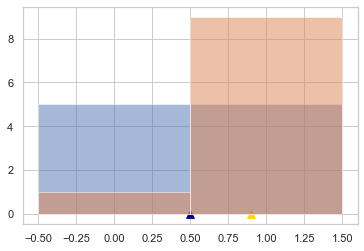

In [69]:
pop_50 = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
pop_90 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

coins = pd.DataFrame(zip(pop_50, pop_90), 
                     columns=["Proportion of 1's: 0.5",
                              "Proportion of 1's: 0.9"]
)
plt.hist(pop_50, bins=np.arange(-0.5, 1.6, 1), alpha=.5)
plt.hist(pop_90, bins=np.arange(-0.5, 1.6, 1), alpha=.5)
plt.scatter(0.5, -0.02, marker='^', color='darkblue', s=60)
plt.scatter(0.9, -0.02, marker='^', color='gold', s=60);

Помните, что в генеральной совокупности возможны только значения 0 и 1.

Синяя гистограмма (50% единиц и 50% нулей) имеет большее распределение, чем желтая. Среднее значение равно 0,5. Половина отклонений от среднего равны 0,5, а вторая половина равна –0,5, поэтому СО составляет 0,5.

В желтой гистограмме вся область сосредоточена около 1, что приводит к меньшему распределению. 90% отклонений невелики: 0,1. Другие 10% — 0,9, что достаточно много, однако общее распределение меньше, чем в синей гистограмме.

То же самое будет наблюдаться, если бы мы изменили пропорцию единиц или увеличили пропорцию нулей, чтобы она превышала пропорции единиц. Давайте проверим это, вычислив СО генеральных совокупностей из 10 элементов, состоящих только из нулей и единиц, в разных пропорциях. Для этого полезна функция `np.ones`. Она принимает положительное целое число в качестве аргумента и возвращает массив, состоящий из указанного числа единиц.

In [84]:
np.array(10)

array(10)

In [87]:
sd = np.zeros(10)
for i in np.arange(10):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i+1), 1-np.ones(10-i+1))
    sd[i] = np.std(population)

zero_one_sds = pd.DataFrame(zip(np.arange(0.1, 1, 0.1), sd),
                            columns=["Population Proportion of 1's",
                                     "Population SD"])

zero_one_sds

,Population Proportion of 1's,Population SD
0,0.1,0.276385
1,0.2,0.372678
2,0.3,0.433013
3,0.4,0.471405
4,0.5,0.493007
5,0.6,0.500000
6,0.7,0.493007
7,0.8,0.471405
8,0.9,0.433013


Неудивительно, что СО генеральной совокупности с 10% _1_ и 90% _0_ совпадает с Генеральной совокупностью с 90% _1_ и 10% _0_. Это связано с тем, что вы передаете столбцы одной гистограммы, чтобы получить другую; распространение остается прежним.

Однако для наших целей наибольшую важность имеет то, что СО увеличивается по мере увеличения числа единиц до тех пор, пока их пропорция не будет составлять 0,5, после чего пропорция начинает симметрично уменьшаться.

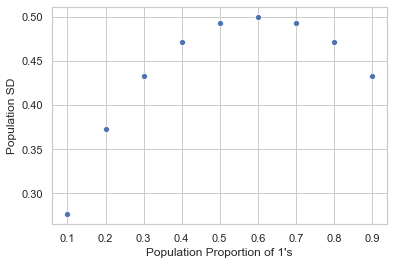

In [95]:
sns.scatterplot(data=zero_one_sds,
                x="Population Proportion of 1's",
                y="Population SD");

Резюме: СО генеральной совокупности нулей и единиц составляет не более 0,5. Это значение СО принимает тогда, когда 50% генеральной совокупности составляют единицы, а остальные 50% — нули.

## Размер выборки

![](./media/formula_3.png)
Поэтому размер выборки должен быть не менее $200^2=40000$. Это огромный размер выборки! Однако это является обязательным, если требуется высокая точность результатов с высоким уровнем достоверности независимо от генеральной совокупности.

